# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
!pip install wandb --quiet
!pip3 install pytorch_lightning torchmetrics --quiet

     |████████████████████████████████| 1.9 MB 26.0 MB/s 
     |████████████████████████████████| 166 kB 66.8 MB/s 
     |████████████████████████████████| 182 kB 63.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 166 kB 59.4 MB/s 
     |████████████████████████████████| 162 kB 58.7 MB/s 
     |████████████████████████████████| 162 kB 61.1 MB/s 
     |████████████████████████████████| 158 kB 54.0 MB/s 
     |████████████████████████████████| 157 kB 71.1 MB/s 
     |████████████████████████████████| 157 kB 33.7 MB/s 
     |████████████████████████████████| 157 kB 57.3 MB/s 
     |████████████████████████████████| 157 kB 58.1 MB/s 
     |████████████████████████████████| 157 kB 62.1 MB/s 
     |████████████████████████████████| 157 kB 55.2 MB/s 
     |████████████████████████████████| 157 kB 56.7 MB/s 
     |████████████████████████████████| 156 kB 57.9 MB/s 
     |████████████████████████████████| 708 kB 7.4 MB/s 
     |███████████

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy as Accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import albumentations as albm
import albumentations.pytorch as ap

# -----------------------------------------------------------------------

def seed_everything(seed):
    # Фиксирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
    # pl.seed_everything(seed)

SEED = 123456
seed_everything(SEED)

# -----------------------------------------------------------------------

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
DEVICEstr = str(DEVICE)

model = None

print('Modules imported.\nSeed fixed.\nDevice:', '\033[1m', str(DEVICE).upper(), '\033[0m')

from google.colab import drive
drive.mount('/content/drive')

Modules imported.
Seed fixed.
Device:  CUDA 
Mounted at /content/drive


In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 --quiet -O dataset.zip && unzip -q dataset.zip

## Задание 0

### Что поможет сделать на 10 из 10 (оба задания)

1. Использовать все возможные методы оптимизации и экспериментировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

## Задание 1. 

Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.

### Подготовка данных

In [ ]:
seed_everything(SEED)

train_transform = transforms.Compose([
    transforms.RandomChoice(
        [
                transforms.RandomRotation(np.random.randint(3, 20)),
                transforms.RandomHorizontalFlip(p=1),
                transforms.RandomVerticalFlip(p=1),
                transforms.RandomAffine(np.random.randint(3, 20)),
                transforms.RandomAdjustSharpness(1 + np.random.random(), p=1),
                transforms.RandomChoice([        
                    transforms.RandomGrayscale(1),
                    transforms.ColorJitter(*[np.min([np.random.random(), 0.8]), np.random.random(), np.random.random(), np.min([np.random.random(), 0.5])])
                ]),
                transforms.RandomPerspective(p=0.7),
                
                transforms.RandomPerspective(p=0),  
        ]
    ),
    transforms.RandomChoice(
        [
                transforms.RandomRotation(np.random.randint(3, 20)),
                transforms.RandomHorizontalFlip(p=1),
                transforms.RandomVerticalFlip(p=1),
                transforms.RandomAffine(np.random.randint(3, 20)),
                transforms.RandomAdjustSharpness(1 + np.random.random(), p=1),
                transforms.RandomChoice([        
                    transforms.RandomGrayscale(1),
                    transforms.ColorJitter(*[np.min([np.random.random(), 0.8]), np.random.random(), np.random.random(), np.min([np.random.random(), 0.5])])
                ]),
                transforms.RandomPerspective(p=0.7),
         
                transforms.RandomPerspective(p=0),  
        ]
    ),
    transforms.RandomChoice(
        [
                transforms.RandomRotation(np.random.randint(3, 20)),
                transforms.RandomHorizontalFlip(p=1),
                transforms.RandomVerticalFlip(p=1),
                transforms.RandomAffine(np.random.randint(3, 20)),
                transforms.RandomAdjustSharpness(1 + np.random.random(), p=1),
                transforms.RandomChoice([        
                    transforms.RandomGrayscale(1),
                    transforms.ColorJitter(*[np.min([np.random.random(), 0.8]), np.random.random(), np.random.random(), np.min([np.random.random(), 0.5])])
                ]),
                transforms.RandomPerspective(p=0.7),
         
                transforms.RandomPerspective(p=0),  
        ]
    ),
    transforms.RandomChoice(
        [
                transforms.RandomRotation(np.random.randint(3, 20)),
                transforms.RandomHorizontalFlip(p=1),
                transforms.RandomVerticalFlip(p=1),
                transforms.RandomAffine(np.random.randint(3, 20)),
                transforms.RandomAdjustSharpness(1 + np.random.random(), p=1),
                transforms.RandomChoice([        
                    transforms.RandomGrayscale(1),
                    transforms.ColorJitter(*[np.min([np.random.random(), 0.8]), np.random.random(), np.random.random(), np.min([np.random.random(), 0.5])])
                ]),
                transforms.RandomPerspective(p=0.7),
         
                transforms.RandomPerspective(p=0),  
        ]
    ),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.ToTensor()
])

seed_everything(SEED)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
# train_dataset = torch.utils.data.Subset(train_dataset, np.random.choice(len(train_dataset), 1000, replace=False))

val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=32)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("Tests passed!")

Tests passed!


### Посмотрим на картиночки

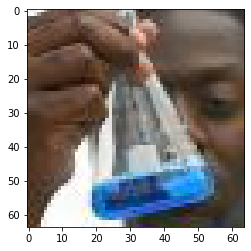

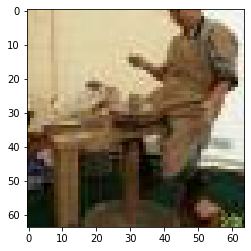

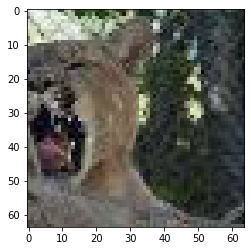

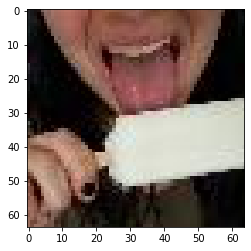

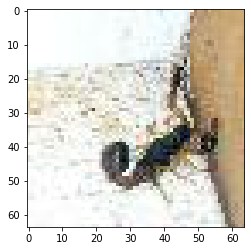

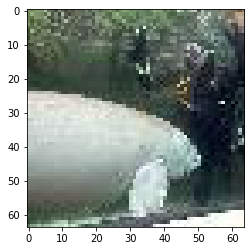

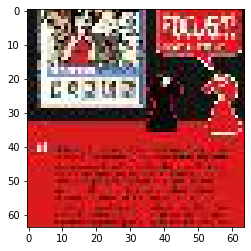

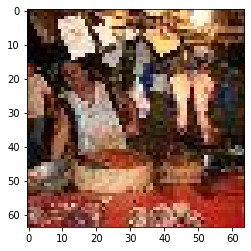

In [ ]:
for batch in train_dataloader:
    images, class_nums = batch
    for n in range(8):
        plt.imshow(images[n].permute(1, 2, 0))
        plt.show()
    break

### Модель (или просто импортируйте не предобученную)

#### Первая собственная модель, от которой было решено отказаться для применения эффективных архитектур из ```torchvision.models```.

> Как понимаю уже после обучения даже ```ResNet18```, она слишком мала для для такой задачи :)

Конкретно эту я отложил, когда у меня ничего не обучалось, а оценка за ДЗ не поднималась выше 0.11 балла. (Т.е. модель выдавала целые числа так, что иногда они всё же оказывались верными ответами. И улучшить не удавалось)

In [ ]:
class CNNModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        

        self.linear1 = torch.nn.Linear(in_features=14 * 14 * 64, out_features=8096)
        self.linear2 = torch.nn.Linear(in_features=8096, out_features=2048)
        self.linear3 = torch.nn.Linear(in_features=2048, out_features=200)
        
        self.act_fun = F.relu

        # --------------
        self.criterion = torch.nn.CrossEntropyLoss()
        self.accuracy = None

    def _forward(self, x):
        # runs the Neural Network
        x = self.conv1(x)
        x = self.conv2(x)
        x = nn.Flatten()(x)
        x = self.act_fun(self.linear1(x))
        x = self.act_fun(self.linear2(x))
        x = self.linear3(x)
        return x

    def forward(self, images, target=None):
        output = self._forward(images)
        pred = torch.argmax(output, dim=-1)

        if target is not None:
            self.accuracy = Accuracy(pred, target)
        return output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor().to(DEVICE)
            self.preds = torch.Tensor().to(DEVICE)
        return self.accuracy

### Тренировочный класс lightning

#### Lightning for custom model
(Без долгих попыток ниже её отладить 😨)

In [ ]:
# probss = []
# targets = []
# class LightCNN(pl.LightningModule):
#     def __init__(self, model, learning_rate):
#         super().__init__()
#         self.model = model
#         self.learning_rate = learning_rate

#     def forward(self, x):
#         return self.model(x)

#     def configure_optimizers(self):
#         optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
#         return optimizer

#     def training_step(self, train_batch, batch_idx):
#         images, target = train_batch
#         probs = self.model(images, target)
#         probss.append(probs)
#         targets.append(target)
#         loss = self.model.criterion(probs, target)
#         acc = self.model.get_accuracy(reset=False)
#         self.log("train_loss", loss, prog_bar=True)
#         self.log("train_acc", acc, prog_bar=True)
#         return loss

#     def validation_step(self, val_batch, batch_idx):
#         images, target = val_batch
#         probs = self.model(images, target)
#         loss = self.model.criterion(probs, target)
#         acc = self.model.get_accuracy(reset=False)
#         self.log("val_loss", loss, prog_bar=True)
#         self.log("val_acc", acc, prog_bar=True)
#         return loss

#### Lightning for imported model

In [ ]:
torchvision.models.resnet101(pretrained=False)

**Попытки**: 
* Разное количество линейных слоёв (решил, что формировать из 2048 слоёв 200 будет достаточно ─ так и оказалось). 
* Не довелось попробовать `BatchNorm1d(...)`, `ReLU(...)` и `Dropout(...)` на линейных слоях.
* `SGD`, `Adam` ─ особой разницы не заметил, хотя пытался.
* Самые разные `learning_rate`'ы: оказалось, что большие lr вообще бессмысленны. Они заставляют модель метаться, лишь затягивая процесс обучения.
* Удачно использовал `ReduceLROnPlateau()` scheduler. Получалось быстро реагировать на невозрастание метрики (accuracy).
* Много идей из [документации](https://pytorch-lightning.readthedocs.io/en/stable/index.html)!!!

In [ ]:
class LightCNN(pl.LightningModule):
    def __init__(self, 
                 model, 
                 learning_rate=0.005):
        super().__init__()
        self.model = model
        self.model.fc = nn.Identity()

        # self.linear1 = nn.Linear(512, 2048)
        # self.linear2 = nn.Linear(2048, 1024)
        # self.classifier = nn.Linear(1024, 200)
        self.classifier = nn.Linear(2048, 200)

        self.learning_rate = learning_rate
        self.criterion = F.cross_entropy
        self.accuracy = None
        self.optimizer = None
        self.automatic_optimization = True

    def forward(self, x):
        # x = F.relu(self.linear1(x))
        # x = F.relu(self.linear2(x))
        # x = self.classifier(x)

        # self.classifier(nn.Dropout(p=0.2)(F.relu(self.model(x))))
        return self.classifier(self.model(x))

    def configure_optimizers(self):
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'max', 0.75, verbose=True, patience=1)
        return {
                "optimizer": self.optimizer,
                "lr_scheduler": {
                    "scheduler": self.lr_scheduler,
                    "monitor": "val_acc",
                    "interval": "step",
                    "frequency": 700
                }
            }

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        probs = self.model(images)
        loss = self.criterion(probs, target)
        self.accuracy = Accuracy(torch.argmax(probs, dim=-1), target)

        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", self.accuracy, prog_bar=True)
        self.log("learning_rate", self.optimizer.param_groups[0]["lr"], on_epoch=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        images, target = images.to(DEVICE), target.to(DEVICE)
        probs = self.model(images)
        loss = self.criterion(probs, target)
        self.accuracy = Accuracy(torch.argmax(probs, dim=-1), target)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", self.accuracy, prog_bar=True, on_epoch=True)
        self.save_hyperparameters()
        return loss

    def get_accuracy(self, reset=False):
        return self.accuracy

### Preparations

In [ ]:
wandb.finish()                                  # Закрываем предыдущую сессию
wandb_logger = WandbLogger(log_model='all')     # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

wandb: Currently logged in as: yaroslav_pr_17. Use `wandb login --relogin` to force relogin


In [ ]:
seed_everything(SEED)

# Стартовые данные
module = LightCNN(model=torchvision.models.resnet101(pretrained=False, num_classes=200), learning_rate=0.004).to(DEVICE)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


#### Создание чекпоинтов ([Докуметация](https://pytorch-lightning.readthedocs.io/en/stable/api/pytorch_lightning.callbacks.ModelCheckpoint.html?highlight=ModelCheckpoint))
* Удалось подключить Google Drive
* Удалось написать скрипт для Google Drive ([Инструкция](http://bpar.ru/news.html?id=26)), т.к. каждая моделька весит 0.5 ГБ, а автоудаления из корзины нет. Пришлось навесить, т.к. храним лишь 5 лучших моделей, остальные удаляются (в ту самую корзину, занимая память) 
* На этом этапе не удалось установить автосохранение ПОСЛЕ валидации. Есть метод `on_validation_end(trainer, pl_module)` ([Документация](https://pytorch-lightning.readthedocs.io/en/stable/api/pytorch_lightning.callbacks.ModelCheckpoint.html?highlight=ModelCheckpoint#pytorch_lightning.callbacks.ModelCheckpoint.on_validation_end)), но как это заставить работать, я не понял.
* Сохранение происходило каждые 600 шагов обучения. Автооптимизация была включена, поэтому не требовалось прописывать шаги самостоятельно.

In [ ]:
seed_everything(SEED)
checkpoint_callback = ModelCheckpoint(
    dirpath='drive/MyDrive/Data/', 
    filename='ResNet101-Improved_transforms-{epoch}-{val_acc:.5f}',
    monitor='val_acc',
    verbose=True,
    mode='max',
    save_top_k=5,
    every_n_train_steps=600,
    save_on_train_epoch_end=False
)
trainer = pl.Trainer(logger=wandb_logger, accelerator='gpu', max_epochs=50, auto_lr_find=False, val_check_interval=600, callbacks=[checkpoint_callback])


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


#### Автоподбор `learning_rate` ([Доку](https://pytorch-lightning.readthedocs.io/en/stable/advanced/training_tricks.html#learning-rate-finder)  [ментация](https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#auto-lr-find))

* Строил графики
* Смотрел, как работает
* Мне не помог, т.к. получались огромные lr'ы, которые пришлось доооолго понижать с помощью scheduler'ов

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_6d7b6037-356d-4ea4-bd8b-afcd494f0b6d.ckpt


0.13182567385564073


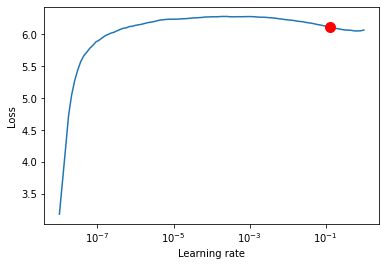

In [ ]:
# lr_finder = trainer.tuner.lr_find(module, train_dataloader, val_dataloader)
# lr_finder.results
# fig = lr_finder.plot(suggest=True)
# fig.show()
# print("Suggested value of LR =", lr_finder.suggestion())

In [ ]:
# seed_everything(SEED)

# trainer.tune(module, train_dataloader, val_dataloader)
# print(module.learning_rate)
# print(module.optimizer.param_groups[0]["lr"])

### Дооолгий процесс обучения
* 36 Эпох (полезных эпох ≈ 28, а `accuracy == 0.4394` уже на 23 эпохе)
* ≈ 6 часов полезного обучения
* Модель: `torchvision.models.resnet101(pretrained=False, num_classes=200)`

In [ ]:
seed_everything(SEED)

trainer.fit(module, train_dataloader, val_dataloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /content/drive/MyDrive/Data exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type   | Params
--------------------------------------
0 | model      | ResNet | 42.5 M
1 | classifier | Linear | 409 K 
--------------------------------------
42.9 M    Trainable params
0         Non-trainable params
42.9 M    Total params
171.640   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:381: UserWarning: `ModelCheckpoint(monitor='val_acc')` could not find the monitored key in the returned metrics: ['train_loss', 'train_acc', 'learning_rate', 'learning_rate_step', 'epoch', 'step']. HINT: Did you call `log('val_acc', value)` in the `LightningModule`?
  warning_cache.warn(m)
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1200: 'val_acc' reached 0.42670 (best 0.42670), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.42670.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1800: 'val_acc' reached 0.42780 (best 0.42780), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.42780.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 2400: 'val_acc' reached 0.42910 (best 0.42910), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.42910.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 3000: 'val_acc' reached 0.42790 (best 0.42910), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.42790.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 3600: 'val_acc' reached 0.42690 (best 0.42910), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=1-val_acc=0.42690.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

Epoch 00005: reducing learning rate of group 0 to 2.2500e-04.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 4200: 'val_acc' reached 0.42760 (best 0.42910), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=1-val_acc=0.42760.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 4800: 'val_acc' reached 0.43080 (best 0.43080), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=1-val_acc=0.43080.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 5400: 'val_acc' reached 0.43180 (best 0.43180), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=1-val_acc=0.43180.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 6000: 'val_acc' reached 0.43190 (best 0.43190), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=1-val_acc=0.43190.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 6600: 'val_acc' reached 0.43250 (best 0.43250), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=2-val_acc=0.43250.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 7200: 'val_acc' reached 0.43430 (best 0.43430), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=2-val_acc=0.43430.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 7800: 'val_acc' reached 0.43490 (best 0.43490), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=2-val_acc=0.43490.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 8400: 'val_acc' reached 0.43740 (best 0.43740), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=2-val_acc=0.43740.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 9000: 'val_acc' reached 0.43480 (best 0.43740), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=2-val_acc=0.43480.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 9600: 'val_acc' reached 0.43510 (best 0.43740), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=3-val_acc=0.43510.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

Epoch 00013: reducing learning rate of group 0 to 1.6875e-04.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 10200: 'val_acc' reached 0.43620 (best 0.43740), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=3-val_acc=0.43620.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 10800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 11400: 'val_acc' was not in top 5


Epoch 00015: reducing learning rate of group 0 to 1.2656e-04.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 12000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 12600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 13200: 'val_acc' reached 0.43940 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=4-val_acc=0.43940.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 13800: 'val_acc' reached 0.43880 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=4-val_acc=0.43880.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 14400: 'val_acc' reached 0.43730 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=4-val_acc=0.43730.ckpt' as top 5


Epoch 00019: reducing learning rate of group 0 to 9.4922e-05.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 15000: 'val_acc' reached 0.43800 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=4-val_acc=0.43800.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 15600: 'val_acc' reached 0.43830 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=4-val_acc=0.43830.ckpt' as top 5
INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 16200: 'val_acc' reached 0.43830 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=5-val_acc=0.43830.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

Epoch 00021: reducing learning rate of group 0 to 7.1191e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 16800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 17400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00023: reducing learning rate of group 0 to 5.3394e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 18000: 'val_acc' reached 0.43880 (best 0.43940), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=5-val_acc=0.43880.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 18600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 19200: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00025: reducing learning rate of group 0 to 4.0045e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 19800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 20400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00027: reducing learning rate of group 0 to 3.0034e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 21000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 21600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 22200: 'val_acc' reached 0.43950 (best 0.43950), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=7-val_acc=0.43950.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 22800: 'val_acc' reached 0.43970 (best 0.43970), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=7-val_acc=0.43970.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 23400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00031: reducing learning rate of group 0 to 2.2525e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 24000: 'val_acc' reached 0.43950 (best 0.43970), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=7-val_acc=0.43950-v1.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 24600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 25200: 'val_acc' reached 0.44030 (best 0.44030), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=8-val_acc=0.44030.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

Epoch 00033: reducing learning rate of group 0 to 1.6894e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 25800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 26400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 27000: 'val_acc' was not in top 5


Epoch 00035: reducing learning rate of group 0 to 1.2671e-05.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 27600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 28200: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 28800: 'val_acc' was not in top 5


Epoch 00037: reducing learning rate of group 0 to 9.5029e-06.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 29400: 'val_acc' reached 0.44000 (best 0.44030), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=9-val_acc=0.44000.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 30000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 30600: 'val_acc' reached 0.44030 (best 0.44030), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=9-val_acc=0.44030.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 31200: 'val_acc' was not in top 5
INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 31800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 32400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00042: reducing learning rate of group 0 to 7.1272e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 33000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 33600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00044: reducing learning rate of group 0 to 5.3454e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 34200: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 34800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 35400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00046: reducing learning rate of group 0 to 4.0090e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 36000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 36600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00048: reducing learning rate of group 0 to 3.0068e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 37200: 'val_acc' reached 0.44000 (best 0.44030), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=11-val_acc=0.44000.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 37800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 38400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00050: reducing learning rate of group 0 to 2.2551e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 39000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 39600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 40200: 'val_acc' reached 0.43990 (best 0.44030), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=12-val_acc=0.43990.ckpt' as top 5


Epoch 00052: reducing learning rate of group 0 to 1.6913e-06.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 40800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 41400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 42000: 'val_acc' was not in top 5


Epoch 00054: reducing learning rate of group 0 to 1.2685e-06.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 42600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 43200: 'val_acc' was not in top 5


Epoch 00056: reducing learning rate of group 0 to 9.5136e-07.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 43800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 44400: 'val_acc' reached 0.44000 (best 0.44030), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=14-val_acc=0.44000.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 45000: 'val_acc' was not in top 5


Epoch 00058: reducing learning rate of group 0 to 7.1352e-07.


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 45600: 'val_acc' reached 0.44050 (best 0.44050), saving model to '/content/drive/MyDrive/Data/First_chechpointed-epoch=14-val_acc=0.44050.ckpt' as top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 46200: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 46800: 'val_acc' was not in top 5
INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 47400: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00061: reducing learning rate of group 0 to 5.3514e-07.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 48000: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 48600: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

Epoch 00063: reducing learning rate of group 0 to 4.0136e-07.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 49200: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 49800: 'val_acc' was not in top 5


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 50400: 'val_acc' was not in top 5
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


#### **Как я выбирал модель**

##### ResNet18
> [wandb_report](https://wandb.ai/yaroslav_pr_17/lightning_logs/reports/?ResNet18--VmlldzoyODU1NjAz?accessToken=gcrohcshu507xsv2n36pw3xmf0163syaawxjxofl2hsd74yhkf35pxknbukf0sq0)
> 
> Выводы:
* Упёрлись в `accuracy=0.401.`
* Модель переобучалась.
* Accuracy на валидации не росла.

##### ResNet18 ─ первая попытка scheduler'a
> [wandb_report](https://wandb.ai/yaroslav_pr_17/lightning_logs/reports/ResNet18--VmlldzoyODU1Njk4?accessToken=zp6lh2c68lhysn9rd2xursh9il9rlfbdl8utykzlonnyc5vr54pk3ak7d3znb7u3)
>
> Выводы:
* Видимо, очень слабая модель.
* Упёрлись в порог `accuracy=0.36`

##### ResNet101
> [wandb_report](https://wandb.ai/yaroslav_pr_17/lightning_logs/reports/ResNet101--VmlldzoyODU1NzI0?accessToken=lwuucsbupz6v199gkzrjpcd6mlzyvra7yv9zn9jm2krqbmczv27t9r1xlo21a7qk)
>
> Выводы:
* Модель сложная (обучение более плавное по сравнению с `ResNet18`)
* Модель переобучается (СИЛЬНО) ─ *как, наверное, и должна модель с огромным количеством параметров*
* Accuracy не растёт


##### ResNet101 с трансформациями (!)
> [wandb_report Начало обучения (20 эпох)](https://wandb.ai/yaroslav_pr_17/lightning_logs/reports/ResNet101--VmlldzoyODU1ODA1?accessToken=vkimz08kg1tft7bkf59q4av9czx3x9dntle240bckn6hhga3othi6uo3p1w0etyo)
>
> [wandb_report_Продолжение обучения (16 эпох)](https://wandb.ai/yaroslav_pr_17/lightning_logs/reports/ResNet101--VmlldzoyODU1ODIx?accessToken=uw7onlmaa5dt60baxrjcdf7ti3803k9cwu6glu45r8t2cdtrmx4cvty7od2m6sh7)
>
> Выводы:
* Использовались различные и почти неизбежные преобразования изображений (несколько последовательных преобразований)
* Если сложная модель переобучается, то искажение обучающей выборки позволит сложной модели не переобучаться. 
* **(УРА!!! Наконец-то получилось сделать какой-то логический вывод, и он оказался верный... Верный же?...)**


#### Дообучение из сохранённой модели

In [ ]:
# Почему-то не сработала нормальная загрузка: 
# LightCNN.load_from_checkpoint("./drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.02510.ckpt")

module = LightCNN(torchvision.models.resnet101(pretrained=False, num_classes=200))
with open("./drive/MyDrive/HW2_part1/ResNet101-Improved_transforms-epoch=8-val_acc=0.44030.ckpt", 'rb') as file:
    checkpoint = torch.load(file)

module.load_state_dict(checkpoint['state_dict'])

module.learning_rate = 0.0003

<All keys matched successfully>

### Валидация результатов задания

In [ ]:
# My eval function

from IPython.display import clear_output

def evaluate_task(module, test_dataloader, device="cuda:0"):
    module.model = module.model.to(device)
    module.eval()
    accuracy = 0.0
    for images, target in test_dataloader:
        images, target = images.to(device), target.to(device)
        with torch.no_grad():
            pred = module.model(images)
            loss = module.criterion(pred, target)
            acc_batch = Accuracy(torch.argmax(pred, dim=-1), target)
        accuracy += acc_batch
        clear_output()
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
from IPython.core.display import deepcopy

accuracy = evaluate_task(module, val_dataloader)
print(accuracy)
print(f"\nОценка за это задание составит {np.clip(10 * accuracy.to('cpu') / 0.44, 0, 10):.2f} баллов")

tensor(0.4423, device='cuda:0')

Оценка за это задание составит 10.00 баллов


In [ ]:
# Official eval function

from sklearn.metrics import accuracy_score
import torch


def evaluate_task_new(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = module.model(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [ ]:
accuracy = evaluate_task_new(module, val_dataloader)
print('\n', accuracy)
print(f"\nОценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

100%|██████████| 313/313 [00:14<00:00, 21.21it/s]


 0.4418

Оценка за это задание составит 10.00 баллов


#### Проверка на различных сохранённых моделях

In [ ]:
from IPython.core.display import deepcopy

accuracy = evaluate_task(module, val_dataloader)
print(accuracy)
print(f"\nОценка за это задание составит {np.clip(10 * accuracy.to('cpu') / 0.44, 0, 10):.2f} баллов")

tensor(0.4263, device='cuda:0')

Оценка за это задание составит 9.69 баллов


In [ ]:
from IPython.core.display import deepcopy

accuracy = evaluate_task(module, val_dataloader)
print(accuracy)
print(f"\nОценка за это задание составит {np.clip(10 * accuracy.to('cpu') / 0.44, 0, 10):.2f} баллов")

tensor(0.4399, device='cuda:0')

Оценка за это задание составит 10.00 баллов


In [ ]:
from IPython.core.display import deepcopy

accuracy = evaluate_task(module, val_dataloader)
print(accuracy)
print(f"\nОценка за это задание составит {np.clip(10 * accuracy.to('cpu') / 0.44, 0, 10):.2f} баллов")

tensor(0.4423, device='cuda:0')

Оценка за это задание составит 10.00 баллов


In [ ]:
from IPython.core.display import deepcopy

accuracy = evaluate_task(module, val_dataloader)
print(accuracy)
print(f"\nОценка за это задание составит {np.clip(10 * accuracy.to('cpu') / 0.44, 0, 10):.2f} баллов")

tensor(0.4408, device='cuda:0')

Оценка за это задание составит 10.00 баллов


### **Вопросы:**

* Стоило ли добивать SGD? (по словам Евгения Андреевича он бывает на удивление хорош)

* Как можно объснить вот такие колебания графиков **train**'a и сделать правильные выводы? Что это значит?
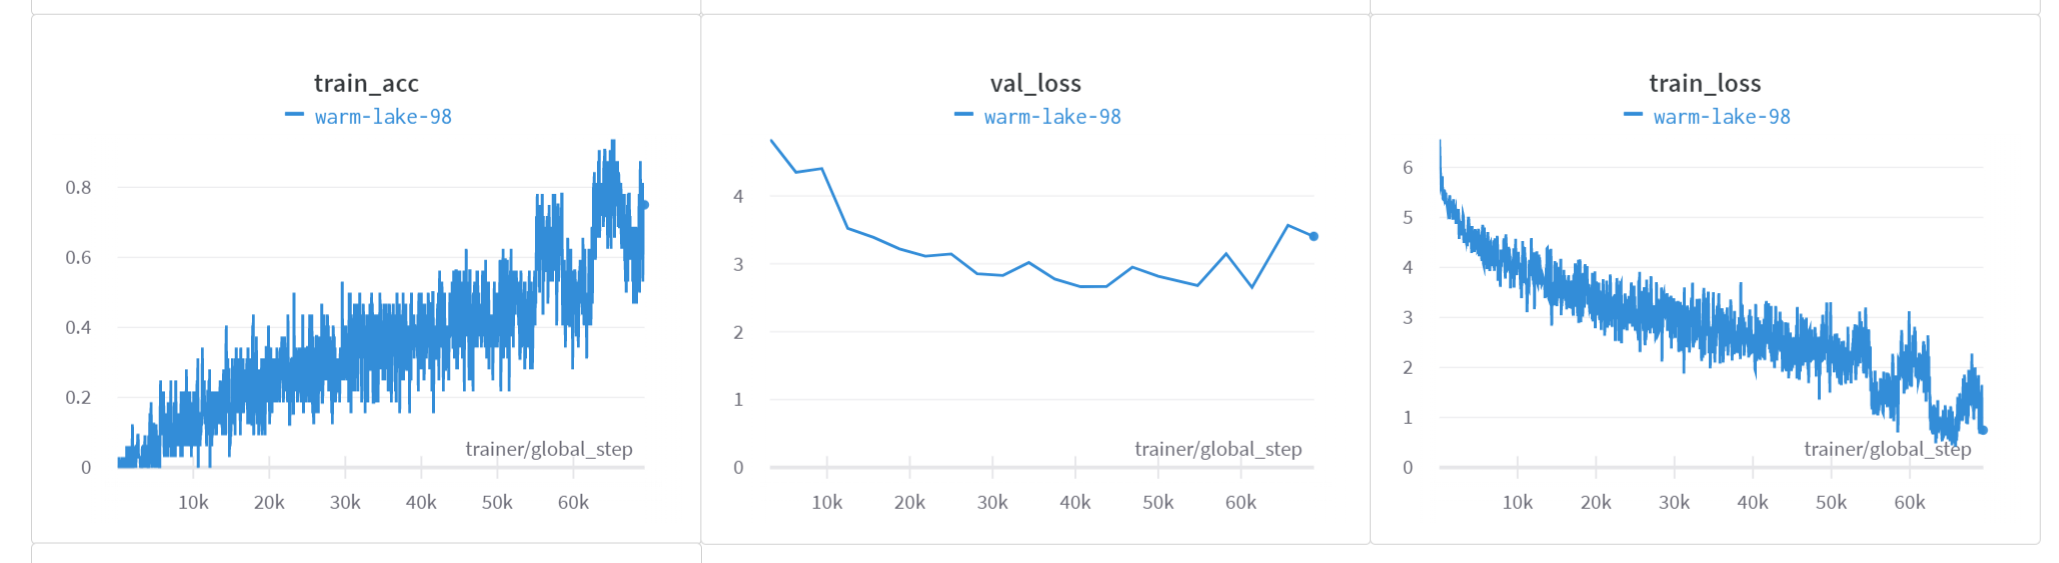



* Как добиться обучения за 30 минут?

* Можно ли как-то было изначально упростить себе жизнь?

* Что было бы в этой задаче эффективным?

## Задание 2

Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

### Подготовка данных

[question](https://github.com/albumentations-team/albumentations/issues/1010) - Адаптация средств `Albumentation` для использования с `torch` (Не использовалось)

In [ ]:
# Если запускать обучение из при новом сеансе коллаба, модель начинает смотреть картинки, которые уже видела.
# Поэтому seed приходилось сменять каждый такой запуск

SEED = 1002

Много времени потратил на создание нормальных аугментаций. Вроде бы получилось прям здорово и очень рандомно.
> **В чатике писали, что аугментации в этой задаче всё портили, это же неправда? Как можно испортить?** С другой стороны, сеть могла обучиться с пушистой кошкой с фильтром розового цвета, а потом не увидеть реального сфинкса. То есть мы бы сбили её с толку. Это же большая проблема, которая может сильно помешать обучению, разве нет?

In [ ]:
seed_everything(SEED)

train_transform = transforms.Compose([

    transforms.RandomChoice([
        transforms.Resize((224, 224)),
        transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop((224, 224)),
        ]),
        transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomCrop((224, 224)),
        ]),
    ]),

    transforms.RandomRotation(np.random.randint(5, 70), interpolation=transforms.InterpolationMode.BILINEAR, fill=np.random.randint(0, 255)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),

    transforms.RandomChoice([
        transforms.RandomAffine(np.random.randint(3, 20), fill=np.random.randint(0, 255)),
        transforms.RandomPerspective(0.4, p=1, fill=np.random.randint(0, 255)),
    ], [0.3, 0.4]),
    
    transforms.RandomAdjustSharpness(np.random.choice([0, 2]), p=0.8),

    transforms.RandomChoice([        
        transforms.RandomGrayscale(p=0.7),
        transforms.ColorJitter(*([0.2]*4))
    ], [0.3, 0.6]),

    transforms.ToTensor(),
    
    transforms.RandomErasing(scale=(0.001, 0.04), p=0.7),
])

val_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])

seed_everything(SEED)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
# train_dataset = torch.utils.data.Subset(train_dataset, np.random.choice(len(train_dataset), 1000, replace=False))

val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=32)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("Tests passed!")

Tests passed!


### Посмотрим на картиночки

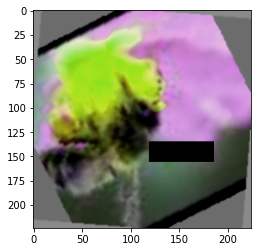

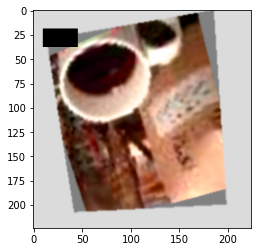

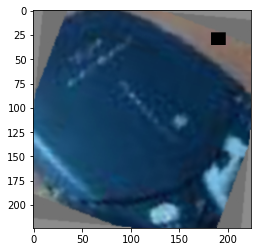

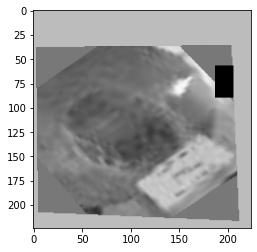

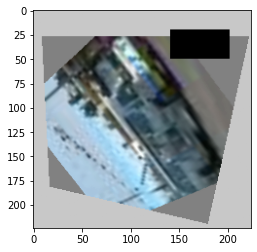

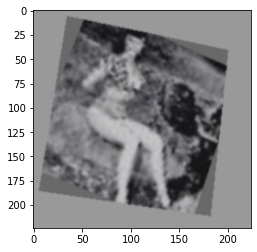

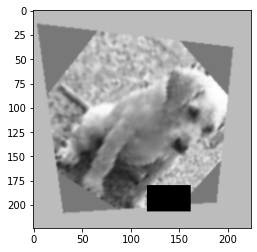

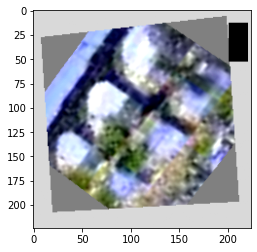

In [ ]:
for batch in train_dataloader:
    images, class_nums = batch
    for n in range(8):
        plt.imshow(images[n].permute(1, 2, 0))
        plt.show()
    break

### Модель (или просто импортируйте предобученную)

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE HERE
        pass

    def _forward(self, x):
        # runs the Neural Network
        # YOUR CODE HERE
        pass

    def forward(self, images, target=None):
        # YOUR CODE HERE
        pass

    def get_accuracy(self, reset=False):
        # YOUR CODE HERE
        pass

### Тренировочный класс lightning

In [ ]:
# Посмотрим на структуру модели

torchvision.models.efficientnet_v2_m()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
class LightCNN(pl.LightningModule):
    def __init__(self, 
                 model, 
                 weights,
                 learning_rate=0.005):
        super().__init__()

        # На случай, если будет нужен трансформ оригинального датасета
        self.transforms = weights.transforms()

        self.model = model
        self.model.classifier[1] = nn.Linear(1280, 200)
        

        # Замораживаем все слои, кроме интересующих (для ResNet50)

        # for param in self.model.parameters():
        #     param.requires_grad = False
        # for param in self.model.classifier.parameters():
        #     param.requires_grad = True
        # for param in self.model.layer4.parameters():
        #     param.requires_grad = True


        # Попытки сделать продвинутый "классификатор". Не пригодился

        # self.model.fc = nn.Sequential(
        #     # nn.Linear(2048, 1024), 
        #     # nn.BatchNorm1d(1024),
        #     # nn.ReLU(),
        #     # nn.Linear(1024, 512),
        #     # nn.BatchNorm1d(512),
        #     # nn.ReLU(),
        #     nn.Linear(2048, 200)
        #     )

        self.learning_rate = learning_rate
        self.criterion = F.cross_entropy
        self.accuracy = None
        self.automatic_optimization = True

    def forward(self, images):
        return self.model(images)

    def configure_optimizers(self):
        # Много оптимизаторов и scheduler'ов для работы с большим количеством слоёв в моделях, у которых формирование
        # ... признаков не вынесено в отдельные блок. Приходилось указывать на каждый conv-блок ставить оптимизатор.

        self.fc_optimizer = torch.optim.Adam(self.model.classifier[1].parameters(), lr=self.learning_rate)
        self.conv_optimizer1 = torch.optim.Adam(self.model.features.parameters(), lr=0.00005)
        # self.conv_optimizer2 = torch.optim.Adam(self.model.layer2.parameters(), lr=0.00005)
        # self.conv_optimizer3 = torch.optim.Adam(self.model.layer3.parameters(), lr=0.00005)
        # self.conv_optimizer4 = torch.optim.Adam(self.model.layer4.parameters(), lr=0.00005)

        self.lr_scheduler_fc = torch.optim.lr_scheduler.ReduceLROnPlateau(self.fc_optimizer, 'max', 0.3, verbose=True, patience=1)
        self.lr_scheduler_conv1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.conv_optimizer1, 'max', 0.3, verbose=True, patience=1)
        # self.lr_scheduler_conv2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.conv_optimizer2, 'max', 0.3, verbose=True, patience=1)
        # self.lr_scheduler_conv3 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.conv_optimizer3, 'max', 0.3, verbose=True, patience=1)
        # self.lr_scheduler_conv4 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.conv_optimizer4, 'max', 0.3, verbose=True, patience=1)

        return ([
                    self.fc_optimizer, 
                    self.conv_optimizer1,
                    # self.conv_optimizer2,
                    # self.conv_optimizer3,
                    # self.conv_optimizer4
                ],
        [
                {   "scheduler": self.lr_scheduler_fc,
                    "monitor": "val_acc",
                    "interval": "step",
                    "frequency": 700
                },
                {
                    "scheduler": self.lr_scheduler_conv1,
                    "monitor": "val_acc",
                    "interval": "step",
                    "frequency": 700
                },
                # {   "scheduler": self.lr_scheduler_conv2,
                #     "monitor": "val_acc",
                #     "interval": "step",
                #     "frequency": 700
                # },
                # {
                #     "scheduler": self.lr_scheduler_conv3,
                #     "monitor": "val_acc",
                #     "interval": "step",
                #     "frequency": 700
                # },
                # {   "scheduler": self.lr_scheduler_conv4,
                #     "monitor": "val_acc",
                #     "interval": "step",
                #     "frequency": 700
                # }
        ])

    def training_step(self, train_batch, batch_idx, optimizer_idx):
        self.train()
        images, target = train_batch
        probs = self.model(images)
        loss = self.criterion(probs, target)
        self.accuracy = Accuracy(torch.argmax(probs, dim=-1), target)

        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", self.accuracy, prog_bar=True)
        self.log("learning_rate_fc", self.fc_optimizer.param_groups[0]["lr"], on_epoch=True)
        self.log("learning_rate_conv1", self.conv_optimizer1.param_groups[0]["lr"], on_epoch=True)
        # self.log("learning_rate_conv2", self.conv_optimizer2.param_groups[0]["lr"], on_epoch=True)
        # self.log("learning_rate_conv3", self.conv_optimizer3.param_groups[0]["lr"], on_epoch=True)
        # self.log("learning_rate_conv4", self.conv_optimizer4.param_groups[0]["lr"], on_epoch=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        images, target = images.to(DEVICE), target.to(DEVICE)
        self.eval()
        probs = self.model(images)
        loss = self.criterion(probs, target)
        self.accuracy = Accuracy(torch.argmax(probs, dim=-1), target)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", self.accuracy, prog_bar=True, on_epoch=True)
        self.save_hyperparameters()
        return loss

    def get_accuracy(self, reset=False):
        return self.accuracy

**TODO:**
* Разобраться с работой Lightning
    * Что происходит с полем `self.accuracy` при одновременном обучении и валидации? (Т.к. они происходят одновременно)
    * Как и когда проиходит сохранение?

### Обучение модели

In [ ]:
wandb.finish()                                                                  # Закрываем предыдущую сессию
wandb_logger = WandbLogger(log_model='all', project='Pretrained_Models')        # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

In [ ]:
seed_everything(SEED)

# Стартовые данные
weights = torchvision.models.EfficientNet_V2_M_Weights.DEFAULT
module = LightCNN(torchvision.models.efficientnet_v2_m(weights=weights).to(DEVICE), weights, learning_rate=0.004).to(DEVICE)

In [ ]:
seed_everything(SEED)
checkpoint_callback = ModelCheckpoint(
    dirpath='drive/MyDrive/Data/', 
    filename='EfficientNet_V2_fine_tuning-{epoch}-{val_acc:.5f}',
    monitor='val_acc',
    verbose=True,
    mode='max',
    save_top_k=10,
    every_n_train_steps=600,
    save_on_train_epoch_end=False
)
trainer = pl.Trainer(logger=wandb_logger, accelerator='gpu', max_epochs=50, auto_lr_find=False, val_check_interval=600, callbacks=[checkpoint_callback])


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# Попытка вручную изменить параметры модели не увенчалась успехом ))

module.optimizers()[0].optimizer.state_dict()['param_groups'][0]['lr'] = 0.003
module.optimizers()[1].optimizer.state_dict()['param_groups'][0]['lr'] = 0.0000375
module.optimizers()[2].optimizer.state_dict()['param_groups'][0]['lr'] = 0.0000375
module.optimizers()[3].optimizer.state_dict()['param_groups'][0]['lr'] = 0.0000375
module.optimizers()[4].optimizer.state_dict()['param_groups'][0]['lr'] = 0.0000375

[0.004, 5e-05, 5e-05, 5e-05, 5e-05]

In [ ]:
seed_everything(SEED)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type                | Params
---------------------------------------------------
0 | transforms | ImageClassification | 0     
1 | model      | EfficientNet        | 53.1 M
---------------------------------------------------
53.1 M    Trainable params
0         Non-trainable params
53.1 M    Total params
212.458   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

### Дообучение из чекпоинта

In [ ]:
# Почему-то не сработала нормальная загрузка: 
# LightCNN.load_from_checkpoint("./drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.02510.ckpt")

weights = torchvision.models.EfficientNet_V2_M_Weights.DEFAULT
module = LightCNN(torchvision.models.efficientnet_v2_m(weights=weights), weights, learning_rate=0.005)
with open("./drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=8-val_acc=0.83770-v1.ckpt", 'rb') as file:
    checkpoint = torch.load(file)

# checkpoint['state_dict']['model.fc.0.weight'] = checkpoint['state_dict']['model.fc.weight']
# checkpoint['state_dict']['model.fc.0.bias'] = checkpoint['state_dict']['model.fc.bias']
# checkpoint['state_dict'].pop('model.fc.weight')
# checkpoint['state_dict'].pop('model.fc.bias')

module.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
for param in module.model.parameters():
    param.requires_grad = True

In [ ]:
wandb.finish()                                                                  # Закрываем предыдущую сессию
wandb_logger = WandbLogger(log_model='all', project='Pretrained_Models')        # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

epoch,▁▁▁▁
learning_rate_conv1_step,▁▁▁▁
learning_rate_fc_step,▁▁▁▁
train_acc,▅█▁▅
train_loss,▄▁█▄
trainer/global_step,▁▃▆█
epoch,7
learning_rate_conv1_step,2e-05
learning_rate_fc_step,0.00127
train_acc,0.875
train_loss,0.5323


In [ ]:
seed_everything(SEED)
checkpoint_callback = ModelCheckpoint(
    dirpath='drive/MyDrive/Data/', 
    filename='Efficient_Net_V2_Afterlearning-{epoch}-{val_acc:.5f}',
    monitor='val_acc',
    verbose=True,
    mode='max',
    save_top_k=10,
    every_n_train_steps=600,
    save_on_train_epoch_end=False
)
trainer = pl.Trainer(logger=wandb_logger, accelerator='gpu', max_epochs=50, auto_lr_find=False, val_check_interval=600, callbacks=[checkpoint_callback])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# Создание базового инстанса модели

module = LightCNN(torchvision.models.efficientnet_v2_m(weights=weights), weights, learning_rate=0.005)

In [ ]:
seed_everything(SEED)

trainer.fit(module, train_dataloader, val_dataloader, ckpt_path="./drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=7-val_acc=0.83770-v1.ckpt")

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at ./drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=7-val_acc=0.83770-v1.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type                | Params
---------------------------------------------------
0 | transforms | ImageClassification | 0     
1 | model      | EfficientNet        | 53.1 M
---------------------------------------------------
53.1 M    Trainable params
0         Non-trainable params
53.1 M    Total params
212.458   Total estimated model params size (MB)
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at ./drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=7-val_acc=0.83770-v1.ckpt


Training: 1521it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 47400: 'val_acc' was not in top 10


Epoch 00031: reducing learning rate of group 0 to 9.4922e-04.
Epoch 00031: reducing learning rate of group 0 to 1.1865e-05.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 48000: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 48600: 'val_acc' was not in top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 49200: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 49800: 'val_acc' was not in top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 50400: 'val_acc' was not in top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 51000: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

Epoch 00033: reducing learning rate of group 0 to 7.1191e-04.
Epoch 00033: reducing learning rate of group 0 to 8.8989e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 51600: 'val_acc' was not in top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 52200: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 52800: 'val_acc' was not in top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 53400: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 54000: 'val_acc' was not in top 10


Epoch 00035: reducing learning rate of group 0 to 5.3394e-04.
Epoch 00035: reducing learning rate of group 0 to 6.6742e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 54600: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 55200: 'val_acc' reached 0.83770 (best 0.83950), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=8-val_acc=0.83770.ckpt' as top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 55800: 'val_acc' reached 0.83770 (best 0.83950), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=8-val_acc=0.83770-v1.ckpt' as top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 56400: 'val_acc' reached 0.83670 (best 0.83950), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.83670.ckpt' as top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 57000: 'val_acc' reached 0.83670 (best 0.83950), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.83670-v1.ckpt' as top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 57600: 'val_acc' reached 0.84030 (best 0.84030), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.84030.ckpt' as top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 58200: 'val_acc' reached 0.84030 (best 0.84030), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.84030-v1.ckpt' as top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 58800: 'val_acc' reached 0.83790 (best 0.84030), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.83790.ckpt' as top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 59400: 'val_acc' reached 0.83790 (best 0.84030), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.83790-v1.ckpt' as top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 60000: 'val_acc' was not in top 10


Epoch 00039: reducing learning rate of group 0 to 4.0045e-04.
Epoch 00039: reducing learning rate of group 0 to 5.0056e-06.


INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 60600: 'val_acc' was not in top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 61200: 'val_acc' reached 0.83930 (best 0.84030), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.83930.ckpt' as top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 61800: 'val_acc' reached 0.83930 (best 0.84030), saving model to '/content/drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=9-val_acc=0.83930-v1.ckpt' as top 10


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 62400: 'val_acc' was not in top 10
INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 63000: 'val_acc' was not in top 10


**УРАААААААААААААААААААААААААААААААААААААА**

image.png

### Оценка модели

In [ ]:
# Почему-то не сработала нормальная загрузка: 
# LightCNN.load_from_checkpoint("./drive/MyDrive/Data/First_chechpointed-epoch=0-val_acc=0.02510.ckpt")

weights = torchvision.models.EfficientNet_V2_M_Weights.DEFAULT
module = LightCNN(torchvision.models.efficientnet_v2_m(weights=weights), weights)
with open("./drive/MyDrive/Data/Efficient_Net_V2_Afterlearning-epoch=8-val_acc=0.83770-v1.ckpt", 'rb') as file:
    checkpoint = torch.load(file)

# checkpoint['state_dict']['model.fc.0.weight'] = checkpoint['state_dict']['model.fc.weight']
# checkpoint['state_dict']['model.fc.0.bias'] = checkpoint['state_dict']['model.fc.bias']
# checkpoint['state_dict'].pop('model.fc.weight')
# checkpoint['state_dict'].pop('model.fc.bias')

module.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
# My eval function   

from IPython.display import clear_output

def evaluate_task(module, test_dataloader, device="cuda:0"):
    module = module.to(device)
    module.eval()
    accuracy = 0.0
    for images, target in test_dataloader:
        images, target = images.to(device), target.to(device)
        with torch.no_grad():
            pred = module.model(images)
            acc_batch = Accuracy(torch.argmax(pred, dim=-1), target)
        accuracy += acc_batch
        clear_output()
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
# Official eval function

from sklearn.metrics import accuracy_score
import torch


def evaluate_task_new(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = module.model(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [ ]:
accuracy = evaluate_task(module, val_dataloader)
print('\n', accuracy)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy.to('cpu') - 0.5) / 0.34, 0, 10):.2f} баллов")


 tensor(0.8382, device='cuda:0')
Оценка за это задание составит 9.95 баллов


In [ ]:
accuracy = evaluate_task_new(module, val_dataloader)
print('\n', accuracy)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████| 313/313 [00:58<00:00,  5.38it/s]



 0.8383
Оценка за это задание составит 9.95 баллов


### Финальная модель: Процесс обучения

* Эпох: ≈10
* Модель: `EfficientNet_V2_L`
* $1.5 \dfrac{ч}{эпоха}$
* Эксперименты: [wandb_report](https://wandb.ai/yaroslav_pr_17/Pretrained_Models/reports/Pretrained_models--VmlldzoyODgzMDM3?accessToken=xz0z15hifetic1anqerg2hhofoac1vwtnsc7vj8k8a0zhc1d0u3izgcy010vgqw0)
* Замечания:
    * Видимо, достигнут предел используемой модели
    * Хотел использовать `EfficientNet_V2_L`, но там сильно больше параметров, и не хватало графической памяти.
    * Не совсем разобрался с сохранением моделей. Не получилось отловить лучшую.
    * Результат в $accuracy=0.82$ был достигнут в течение $3.5ч$ обучения. Остальное время было потрачено на распознавание неуменьшения лосса на валидации и (слишком) постепенное снижение `learning_rate`. Разумнее было бы за это время обучить другую модель, может быть, даже не одну :)

На всякий случай:
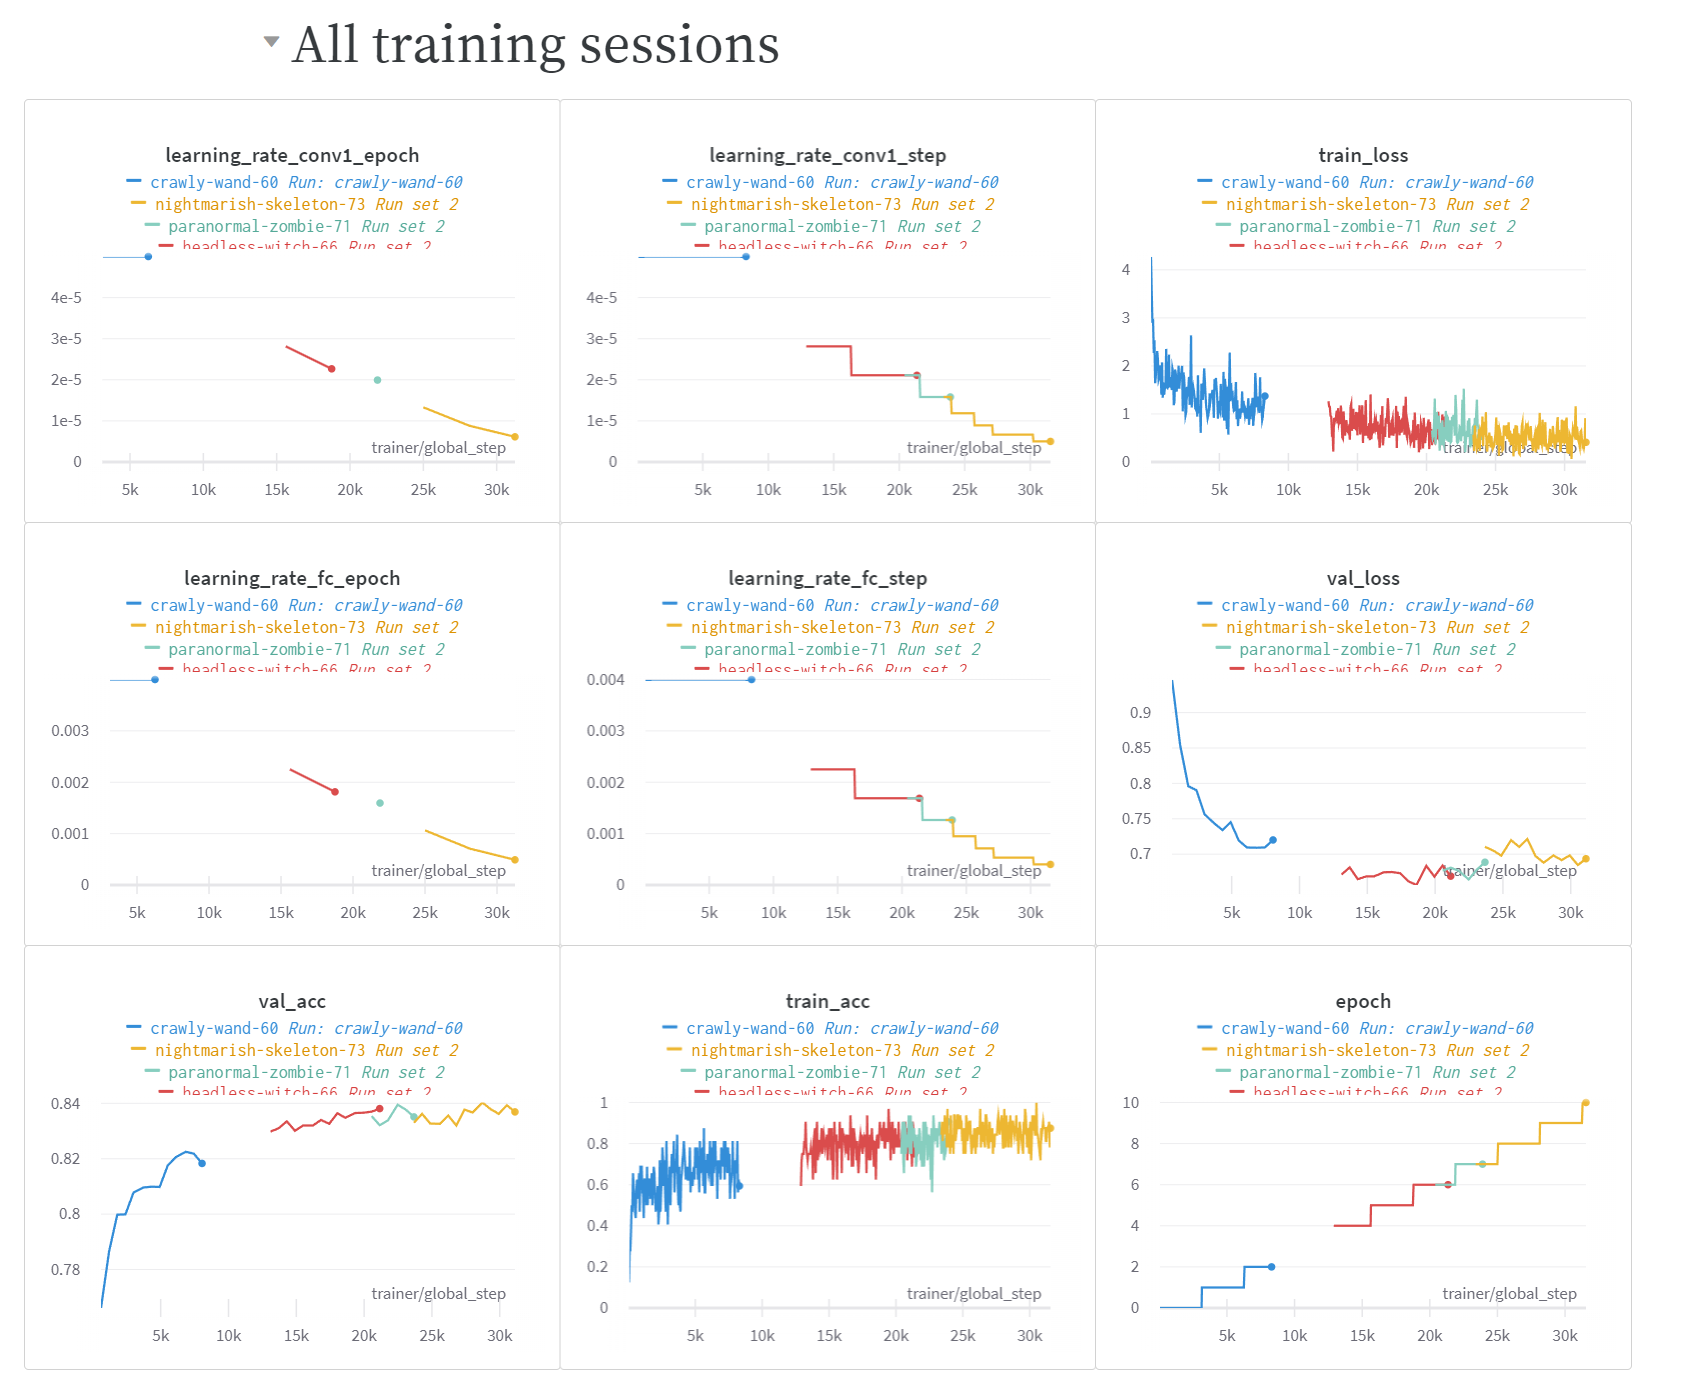

### Как я подбирал модели

1) **ResNet18** ─ Начало $0.47$, $max≈0.66$. Видимо, оказалась слишком слабой.

2) Попытки обучить с:
* Несколькими линейными слоями классификатора (**Насколько это теоретически обоснованно?**)
* Замороженными свёрточными слоями. Модель переобучалась, но последующая "регуляризация" в лице разморозки conv слоёв и обучения в аугментациями сильно рушила *accuracy* без последующего восстановления.
* Разными значениями нормализации. Вроде бы не нужно, т.к. значения матриц картинок не превышали единицу, да и хуже только становилось.

3) Другие модели: **VGG-16**, **VGG-19**, **ResNet50**. Лучший результат ResNet50: $0.756$. (После нескольких эпох обучения и сильного снижения `lr`)

4) **ResNet101** ─ AAAAAAAAA страшно, 3.5 часа одна эпоха.

5) Ставим несколько оптимизаторов на различные слои (Очень неудобные ResNet'ы + Inception, т.к. "признаковые" слои перечислены отдельно, и при создании оптимизатора нельзя инициализировать параметрами сразу всех conv-слоёв, а только по отдельности)

6) Наткнулся на [замечательный сайт](https://paperswithcode.com/sota/image-classification-on-imagenet), где один из лучших результатов выбила **EfficientNet_V2**! И попробовал! И получилось аш $0.766$ с первого получаса обучения! 

7) Долгие попытки завести Albumentation ([tds](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)). Получилось, но он возвращал тензоры $[0, 255]$, c которыми не очень хотелось разбираться. Улучшение производительности было незначительным.

8) Никогда не читал столько документации, сколько потребовалось для этого задания...

# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания

У каждого задания свой отчёт:
[Задание 1]
[Задание 2]